Customer Segmentation

○ How can we segment customers effectively based on their banking behavior and
preferences?

○ Objective: Develop a segmentation model using customer attributes and
transactional data.

○ Expected Outcome: Identify key segments with distinct behaviors, such as
high-value customers, occasional users, or budget-conscious clients.


Key aspects of customer segmentation in banking:

- Data analysis:
Utilizing customer data from various sources like transaction history, account balances, demographics, digital interactions, and credit scores to identify patterns and group customers with similar characteristics. 

- Segmentation criteria:
Demographic: Age, gender, income level, occupation, marital status, location 

- Behavioral: Spending habits, transaction volume, channel usage (online banking, mobile app), product usage 

- Financial: Credit score, net worth, loan amount 

- Psychographic: Lifestyle, risk tolerance, financial goals 

Examples of customer segments in banking:
- Young Professionals: High digital engagement, moderate income, looking for budgeting tools and investment options 

- High Net Worth Individuals: High income, seeking premium services, personalized financial advice 

- Small Business Owners: Need for business loans, cash flow management tools, merchant services 

- Retirement Age Customers: Focus on income stability, conservative investment strategies 

Benefits of customer segmentation for personalized banking:

- Improved customer experience: By understanding individual needs, banks can deliver targeted offers, communication, and product recommendations 

- Enhanced customer retention: Personalized services can increase customer loyalty and reduce churn 

- Increased sales and profitability: Tailored marketing campaigns and product offerings can lead to higher conversion rates and cross-selling opportunities 

How to implement customer segmentation:

- Data collection and analysis:
Gather comprehensive customer data from various sources using CRM systems and data analytics tools 

- Cluster analysis:
Utilize statistical techniques to identify distinct customer segments based on their shared characteristics 

- Develop targeted strategies:
Design personalized products, marketing campaigns, and communication channels for each segment 

- Continuous monitoring and refinement:
Regularly review customer data and adjust segmentation strategies as customer needs evolve 

   customer_id  age          job   marital  education credit_default  \
0            1   38  blue-collar   married  secondary             no   
1            2   18      student  divorced   tertiary             no   
2            3   73     services  divorced  secondary             no   
3            4   87      retired   married    primary             no   
4            5   20   technician    single    primary             no   

      customer_segment    region  income                  created_at  \
0           High-Value     Urban    2603  2020-09-23 22:11:32.308466   
1  Young Professionals  Suburban     793  2022-04-25 00:06:57.094379   
2     Budget-Conscious     Urban    3130  2021-07-21 13:09:42.193173   
3              Retired     Urban    2401  2024-04-21 00:54:54.070579   
4     Budget-Conscious  Suburban    3354  2020-06-04 02:12:43.905811   

  credit_card personal_loan mortgage savings_account investment_product  \
0         yes           yes      yes             yes       

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


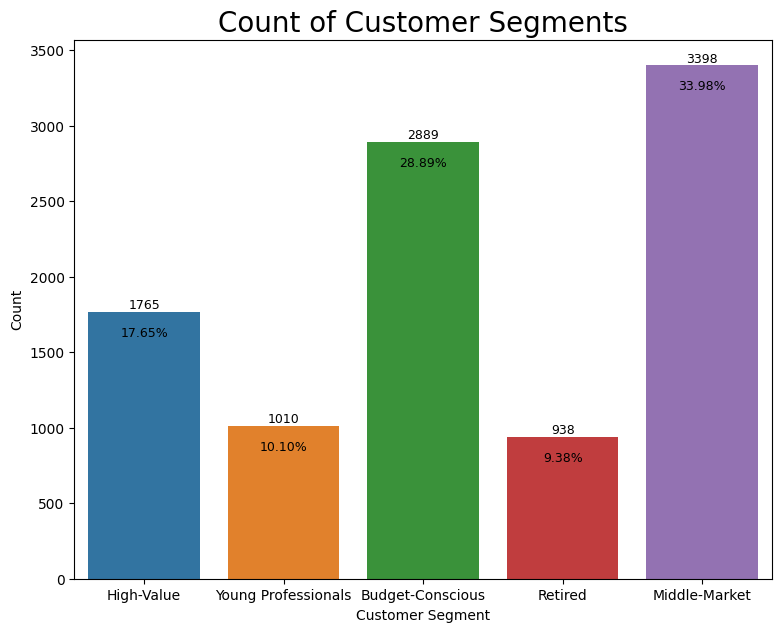

In [39]:
# Importing of dataset
import pandas as pd
data = pd.read_csv('customers.csv')
print(data.head()) # Displaying the first few rows of the dataset
# Remove the 'created_at' column
data = data.drop('created_at', axis=1)
#print(data.columns) # Displaying the columns of the dataset
#print(data.shape) # Displaying the shape of the dataset, 10000 rows and 16 columns

# Plotting customer segments 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))  # Set the figure size
ax = sns.countplot(data['customer_segment'])

# Set smaller font size for the labels
ax.set_xlabel('Customer Segment', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Count of Customer Segments', fontsize=20)

# Add count labels on top of each bar, and the percentage of the total count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
    ax.annotate(f'{p.get_height() * 100 / data.shape[0]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, -15),
                textcoords='offset points')

# Show plot
plt.show()


We can portray this number using table visualisation tools like PowerBI or Tableau

Based on the usual features provided, this would be how the customer segmentation model would look like using a Random Forest model

Accuracy: 52.95%
Cross-validation accuracy: 52.49%


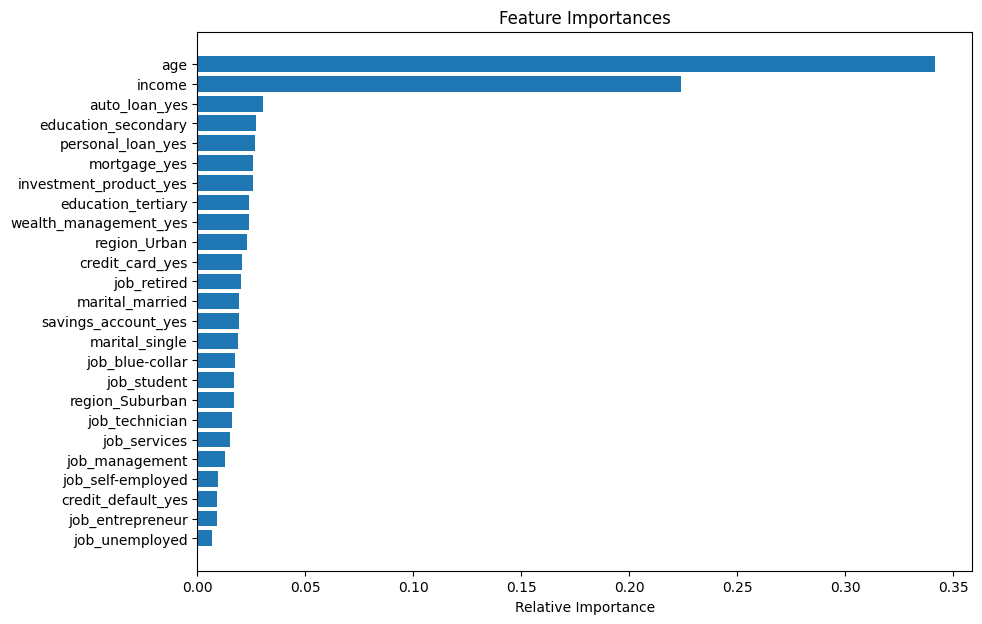

In [40]:
# Create the segmentation model using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Drop irrelevant columns from the dataset
X = data.drop(['customer_segment', 'customer_id'], axis=1)
y = data['customer_segment']

# One-hot encode the categorical columns
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the customer segments
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%')

# Display the feature importances
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Now, we will use another model, the decision tree in segmenting customers.

Accuracy: 47.80%
Cross-validation accuracy: 46.86%


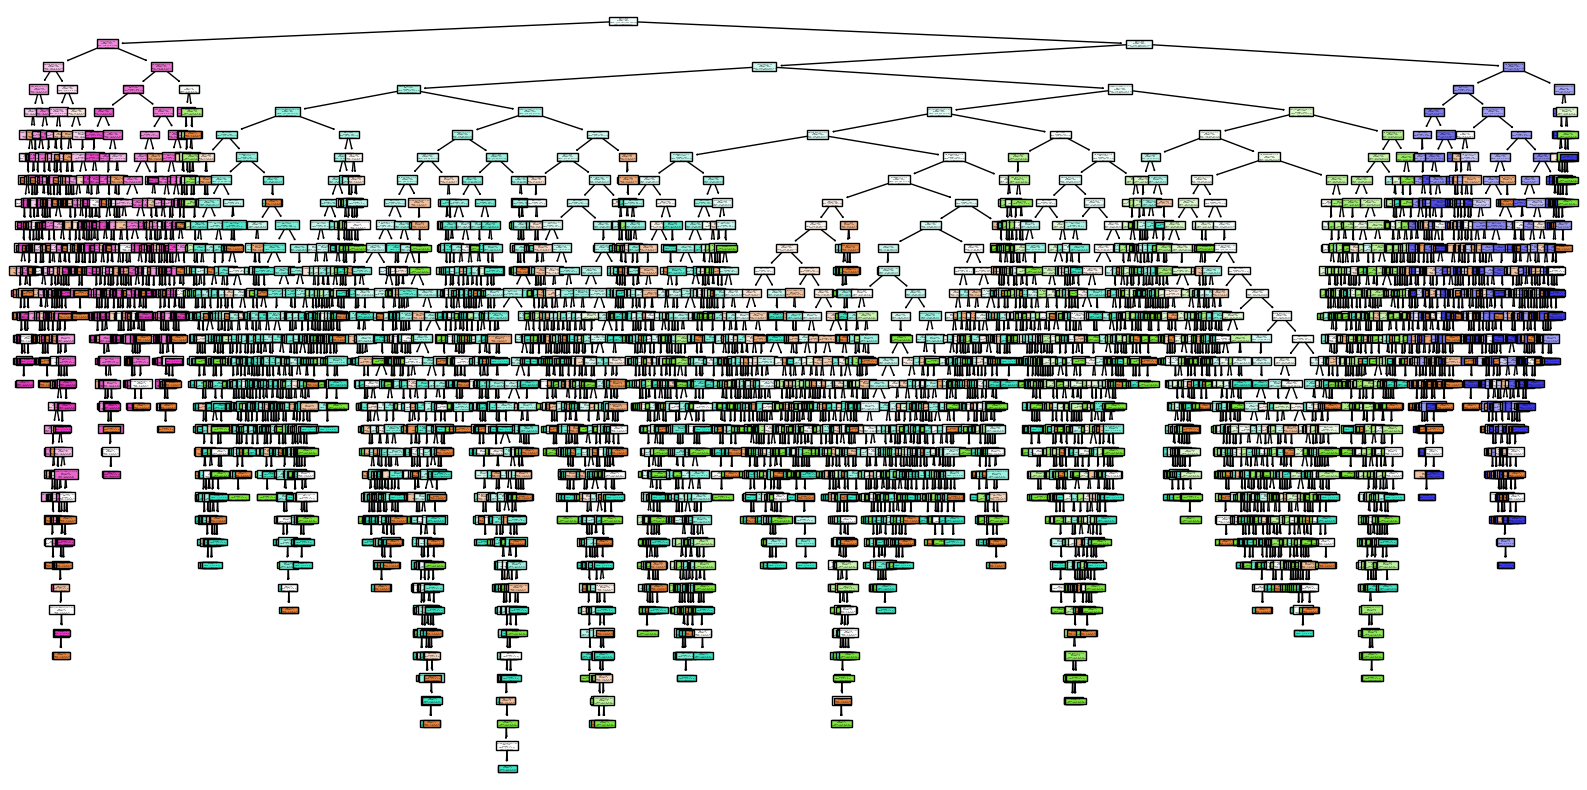

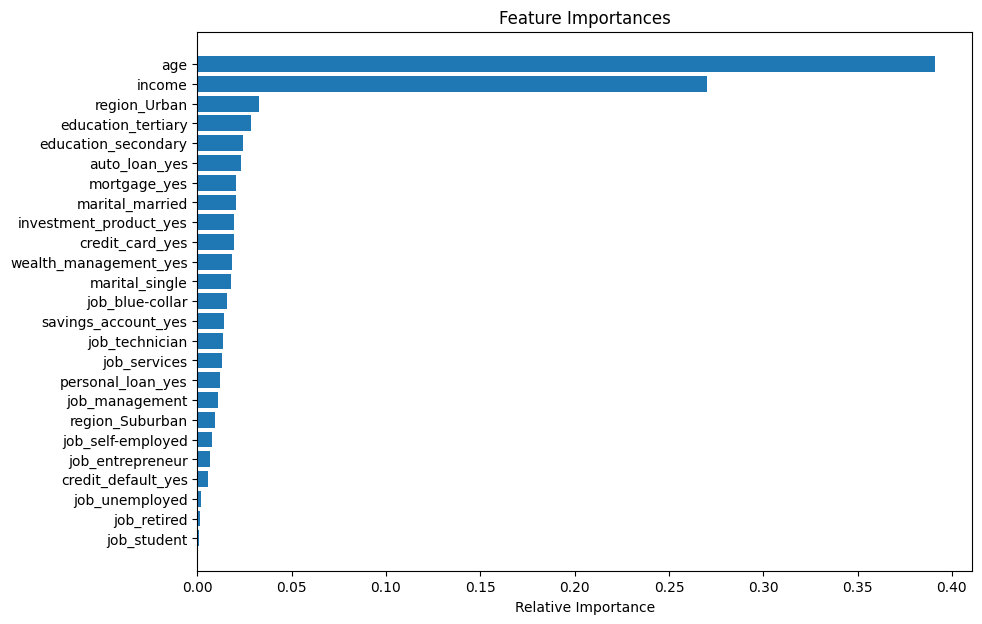

In [41]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Create the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the customer segments
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%')

# Convert class names to strings
class_labels = [str(cls) for cls in y.unique()]

# Convert feature names to a list
feature_names = list(X.columns)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_labels)
plt.show()

# Feature importance
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




Clearly, both Random Forest and Decision Trees model have shown that it is not possible to use supervised learning models to predict / allocate customers to their segmented groups. This could be due to poor customer segmentation from the very beginning. We will now use PCA projection to visualise the clusters.

                             PC1       PC2
age                     0.000912 -0.391368
income                  0.511288 -0.075239
job_blue-collar        -0.215400 -0.110384
job_entrepreneur        0.177853  0.027026
job_management          0.402496 -0.009048
job_retired            -0.102516 -0.174262
job_self-employed       0.071752  0.013011
job_services           -0.148011 -0.057714
job_student            -0.118376  0.397311
job_technician          0.102295  0.057644
job_unemployed         -0.163730  0.013867
marital_married         0.119658 -0.436014
marital_single         -0.100885  0.489670
education_secondary    -0.262938 -0.229812
education_tertiary      0.367719  0.285607
credit_default_yes     -0.048888 -0.012149
region_Suburban        -0.021332  0.027051
region_Urban            0.022350 -0.028714
credit_card_yes         0.153651 -0.135750
personal_loan_yes      -0.126814  0.003370
mortgage_yes            0.138086 -0.177741
savings_account_yes     0.020678 -0.047298
investment_

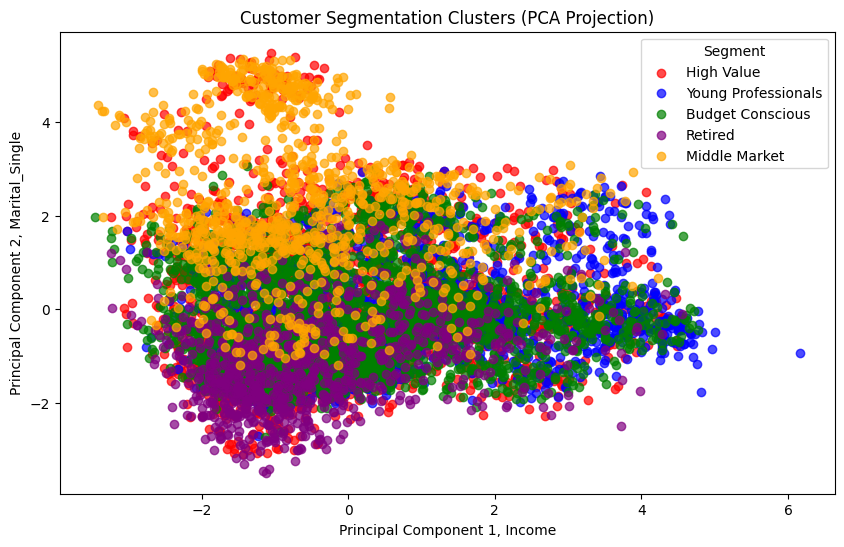

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Ensure X is numeric

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results into a DataFrame
data['customer_segment'] = pd.Categorical(data['customer_segment']).codes # Convert to numeric
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['customer_segment'] 

# Define cluster names
cluster_names = {0: "High Value", 1: "Young Professionals", 2: "Budget Conscious", 
                 3: "Retired", 4: "Middle Market"}
pca_df['Cluster Name'] = pca_df['Cluster'].map(cluster_names)

# Define custom colors for each cluster
cluster_colors = {
    "High Value": "red",
    "Young Professionals": "blue",
    "Budget Conscious": "green",
    "Retired": "purple",
    "Middle Market": "orange"
}

# Plot each cluster with its specific color
plt.figure(figsize=(10, 6))
for cluster, color in cluster_colors.items():
    subset = pca_df[pca_df['Cluster Name'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=cluster, alpha=0.7)


# Get the PCA loadings (i.e., feature contributions)
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
# Display the loadings
print(pca_loadings.T)  # Transposed for easier reading
# Find pc1 and pc2 features with the highest loadings
pc1_features = pca_loadings.T['PC1'].sort_values(ascending=False)
pc2_features = pca_loadings.T['PC2'].sort_values(ascending=False)
print(pc1_features.head(1)) # income
print(pc2_features.head(1)) # marital_single

# Plot settings
plt.title('Customer Segmentation Clusters (PCA Projection)')
plt.xlabel('Principal Component 1, Income')
plt.ylabel('Principal Component 2, Marital_Single')
plt.legend(title='Segment')
plt.show()



As seen from the above plot, we can see that against Income and Marital_Single, High Value Segment has a lower income and a very high marital_single variable (means single). For retired segment, it has a lower income and low marital_single variable (means married). For Young professionals segments, it leans towards high income with no clear indication of marital status and for budget conscious segment, there are no real patterns in both income and marital status. We will attempt to create a better segmentation that will improve campaign ROI, increase customer's engagement and reduce the churn numbers of existing customers.

Now, we will create a new segmentation model, by leveraging on other dataset that includes customers' transaction data and their banking attributes.

In [163]:
# Import the datasets
Transaction = pd.read_csv('transactions_summary.csv')
Usage = pd.read_csv('digital_usage.csv')

# View the first few rows of the datasets
#print(Transaction.head())
#print(Usage.head())

# View the columns of the datasets
print(Transaction.columns)
print(Usage.columns)


Index(['customer_id', 'days_since_last_transaction', 'current_balance',
       'peak_month', 'peak_month_spending', 'peak_month_frequency',
       'total_transactions_3m', 'total_transactions_6m',
       'total_transactions_12m', 'total_transaction_amount_3m',
       'total_transaction_amount_6m', 'total_transaction_amount_12m',
       'average_transaction_amount_3m', 'average_transaction_amount_6m',
       'average_transaction_amount_12m', 'transaction_frequency_3m',
       'transaction_frequency_6m', 'transaction_frequency_12m',
       'high_value_transaction_rate_3m', 'high_value_transaction_rate_6m',
       'high_value_transaction_rate_12m', 'online_transaction_ratio_3m',
       'online_transaction_ratio_6m', 'online_transaction_ratio_12m'],
      dtype='object')
Index(['customer_id', 'has_mobile_app', 'has_web_account',
       'mobile_logins_per_week', 'web_logins_per_week',
       'avg_mobile_session_duration', 'avg_web_session_duration',
       'last_mobile_login', 'last_web_log

Now, we will clean the datasets before merging. Starting off with the Usage dataset

In [149]:
# Cleaning the Usage dataset
# Check for missing values
# print(Usage.isnull().sum())

# Check for 0 values in the datasets
# print((Usage == 0).sum())

# Check if Usage dataset is clean
print(Usage.describe())

# Check if last_mobile_login is null, the mobile_logins_per_week is 0, avg_mobile_session_duration is 0, and has_mobile_app is No
sum_mobile_null = Usage['last_mobile_login'].isnull().sum()
print(sum_mobile_null) # 1659
sum_mobile = 0
for _, row in Usage.iterrows():
    if row['has_mobile_app'] == 'No' and pd.isnull(row['last_mobile_login']) and row['mobile_logins_per_week'] == 0 and row['avg_mobile_session_duration'] == 0:
        sum_mobile += 1
print(sum_mobile) # 1659, the number matches as expected

# Check if last_web_login is null, the web_logins_per_week is 0, avg_web_session_duration is 0, and has_web_account is No
sum_web_null = Usage['last_web_login'].isnull().sum()
print(sum_web_null) # 1539
sum_web = 0
for _, row in Usage.iterrows():
    if row['has_web_account'] == 'No' and pd.isnull(row['last_web_login']) and row['web_logins_per_week'] == 0 and row['avg_web_session_duration'] == 0:
        sum_web += 1
print(sum_web) # 1539, the number matches as expected

# Check if last_mobile_login is null, the sum of mobile_logins_per_week is 0, avg_mobile_session_duration is 0, and has_mobile_app is No
sum_mobile = 0
for _, row in Usage.iterrows():
    if pd.isnull(row['last_mobile_login']):
        sum_mobile += row['mobile_logins_per_week'] + row['avg_mobile_session_duration'] + (1 if row['has_mobile_app'] == 'Yes' else 0)
print(sum_mobile) # 0, the number matches as expected

# Check if last_web_login is null, the sum of web_logins_per_week is 0, avg_web_session_duration is 0, and has_web_account is No
sum_web = 0
for _, row in Usage.iterrows():
    if pd.isnull(row['last_web_login']):
        sum_web += row['web_logins_per_week'] + row['avg_web_session_duration'] + (1 if row['has_web_account'] == 'Yes' else 0)
print(sum_web) # 0, the number matches as expected

# Remove irrelevant columns
Usage = Usage.drop(['last_mobile_login', 'last_web_login'], axis=1)

       customer_id  mobile_logins_per_week  web_logins_per_week  \
count  10000.00000            10000.000000          10000.00000   
mean    5000.50000                6.458500              5.06760   
std     2886.89568                3.546764              2.63684   
min        1.00000                0.000000              0.00000   
25%     2500.75000                5.000000              4.00000   
50%     5000.50000                7.000000              5.00000   
75%     7500.25000                9.000000              7.00000   
max    10000.00000               14.000000             11.00000   

       avg_mobile_session_duration  avg_web_session_duration  
count                 10000.000000              10000.000000  
mean                      3.030540                  4.471440  
std                       1.964464                  2.674307  
min                      -0.000000                 -0.000000  
25%                       1.600000                  2.800000  
50%               

This shows that the Usage dataset is clean. Now we will check if the Transaction dataset is clean.

In [164]:
# Cleaning the Transaction dataset
# Check for missing values
# print(Transaction.isnull().sum()) # 0

# Check for 0 values in the dataset
# print((Transaction == 0).sum()) # Multiple 0 values in the dataset

# Check the Statistics of the dataset
# print(Transaction.describe()) # Negative Balance, negative peak_month_spending, 0 values in the dataset

# Remove all the negative rows in the dataset
Transaction = Transaction[Transaction['current_balance'] >= 0]
Transaction = Transaction[Transaction['peak_month_spending'] >= 0]

print(Transaction.describe()) 

# Shape of the dataset
print(Transaction.shape) # 9940 rows and 24 columns

# Find the rows where average_transaction_amount_12m is 0
zero_avg_transaction = Transaction[Transaction['average_transaction_amount_12m'] == 0]
# Show in table format
display(zero_avg_transaction)


        customer_id  days_since_last_transaction  current_balance  \
count   9940.000000                  9940.000000      9940.000000   
mean    5000.387827                    23.904527      6835.469185   
std     2885.720548                    36.112473      4657.206812   
min        1.000000                     0.000000         0.000000   
25%     2501.750000                     5.000000      3670.094710   
50%     4999.500000                    14.000000      5884.822167   
75%     7499.250000                    26.000000      8863.982631   
max    10000.000000                   200.000000     39748.029652   

        peak_month  peak_month_spending  peak_month_frequency  \
count  9940.000000          9940.000000           9940.000000   
mean      6.613380         16752.335891             43.036519   
std       3.579621         17618.017033             11.596799   
min       1.000000             0.000000             12.000000   
25%       3.000000          6019.524591             3

customer_id  days_since_last_transaction  current_balance  peak_month  \
7120         7121                          130              0.0           9   
8160         8161                            4              0.0           7   

      peak_month_spending  peak_month_frequency  total_transactions_3m  \
7120                  0.0                    16                      0   
8160                  0.0                    35                     88   

      total_transactions_6m  total_transactions_12m  \
7120                    112                     162   
8160                    171                     320   

      total_transaction_amount_3m  ...  average_transaction_amount_12m  \
7120                          0.0  ...                             0.0   
8160                          0.0  ...                             0.0   

      transaction_frequency_3m  transaction_frequency_6m  \
7120                  0.000000                 18.666667   
8160                 29.333333                 28.500000   

      transaction_frequency_12m  high_value_transaction_rate_3m  \
7120                  13.500000                        0.000000   
8160                  26.666667                        0.034091   

      high_value_transaction_rate_6m  high_value_transaction_rate_12m  \
7120                        0.098214                         0.049383   
8160                        0.046784                         0.037500   

      online_transaction_ratio_3m  online_transaction_ratio_6m  \
7120                     0.000000                     0.470890   
8160                     0.726451                     0.672533   

      online_transaction_ratio_12m  
7120                      0.510629  
8160                      0.628687  

[2 rows x 24 columns]

From the above cleaning, we have removed the negative values by eliminating the entire row. We kept the 0 values since there could be a possibility (low) that current balance is 0 and therefore the rest of the transaction information is 0 as well.

We will now clean the Customer dataset

In [151]:
# Clean the Customer Dataset
Customers = pd.read_csv('customers.csv')

# Check the statistics of the dataset
# print(Customers.describe()) # There are negative incomes in the dataset

# Remove all the negative rows in the dataset
Customers = Customers[Customers['income'] >= 0]

# Remove the 'created_at' column, 'customer_segment' column
Customers = Customers.drop(['created_at', 'customer_segment'], axis=1)

# Check the statistics of the dataset
print(Customers.describe()) # No negative

# Shape of the dataset
print(Customers.shape) # 9940 rows and 16 columns
print(Customers)


        customer_id          age        income
count   9940.000000  9940.000000   9940.000000
mean    5000.387827    45.150905   3414.082495
std     2885.720548    14.712428   2026.116644
min        1.000000    10.000000      0.000000
25%     2501.750000    35.000000   2087.750000
50%     4999.500000    45.000000   3156.000000
75%     7499.250000    54.000000   4133.500000
max    10000.000000    99.000000  14272.000000
(9940, 15)
      customer_id  age          job   marital  education credit_default  \
0               1   38  blue-collar   married  secondary             no   
1               2   18      student  divorced   tertiary             no   
2               3   73     services  divorced  secondary             no   
3               4   87      retired   married    primary             no   
4               5   20   technician    single    primary             no   
...           ...  ...          ...       ...        ...            ...   
9995         9996   20   management    si

We have removed negative income in the Customers dataset. We will now merge the 3 datasets.

In [152]:
# Merge the datasets
df = pd.merge(Customers, Transaction, on='customer_id', how='inner')
df = pd.merge(df, Usage, on='customer_id', how='inner')

# Check the shape of the merge dataset
print(df.shape) # 9940 rows
print(df.columns)

(9940, 44)
Index(['customer_id', 'age', 'job', 'marital', 'education', 'credit_default',
       'region', 'income', 'credit_card', 'personal_loan', 'mortgage',
       'savings_account', 'investment_product', 'auto_loan',
       'wealth_management', 'days_since_last_transaction', 'current_balance',
       'peak_month', 'peak_month_spending', 'peak_month_frequency',
       'total_transactions_3m', 'total_transactions_6m',
       'total_transactions_12m', 'total_transaction_amount_3m',
       'total_transaction_amount_6m', 'total_transaction_amount_12m',
       'average_transaction_amount_3m', 'average_transaction_amount_6m',
       'average_transaction_amount_12m', 'transaction_frequency_3m',
       'transaction_frequency_6m', 'transaction_frequency_12m',
       'high_value_transaction_rate_3m', 'high_value_transaction_rate_6m',
       'high_value_transaction_rate_12m', 'online_transaction_ratio_3m',
       'online_transaction_ratio_6m', 'online_transaction_ratio_12m',
       'has_mobile

Now, we will find the optimal number of customer segments

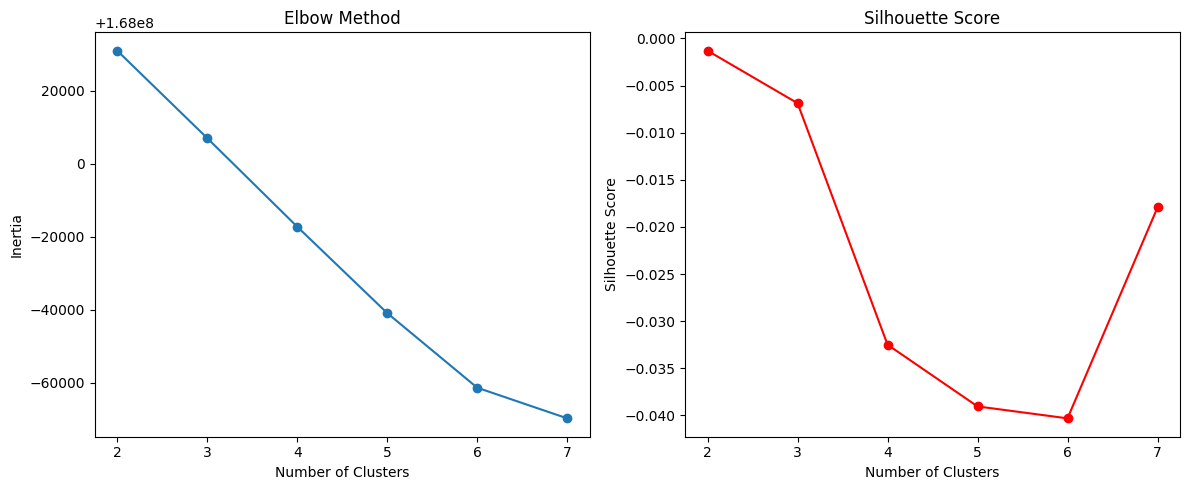

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Remove 'customer_id' column
df = df.drop('customer_id', axis=1)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 8)  # Start from 3 clusters to max 7 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

The higher the silhouette score, the better the segmentation. The graph above shows that all silhouette scores are in the negative. This suggests poor clustering and it could be due to large number of features present. We will now try to do customer segmentation without merging.

Index(['job', 'marital', 'education', 'credit_default', 'region',
       'credit_card', 'personal_loan', 'mortgage', 'savings_account',
       'investment_product', 'auto_loan', 'wealth_management'],
      dtype='object')


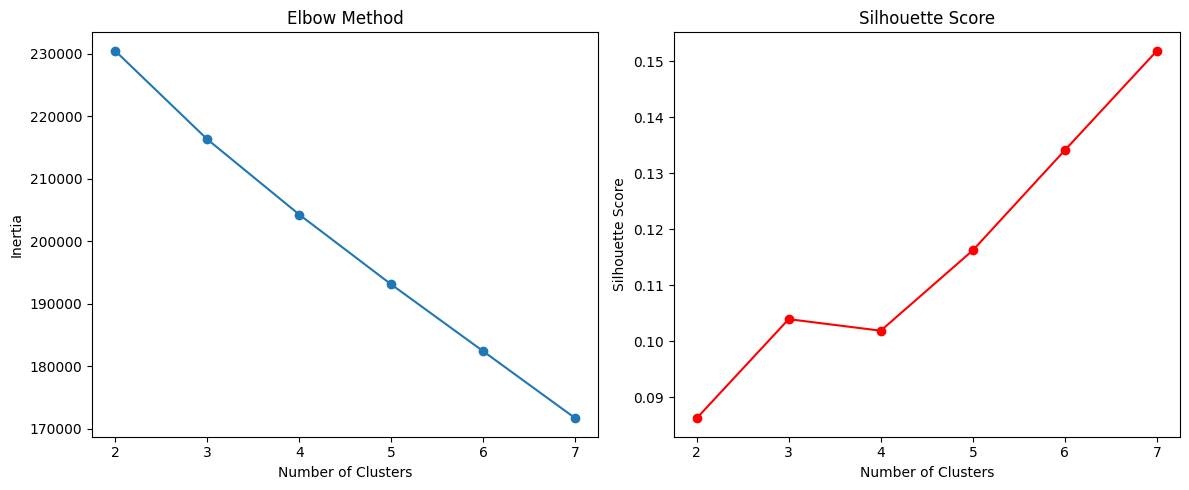

In [142]:
# Kmeans clustering for Customers dataset
# Finding the optimal number of clusters

# Remove 'customer_id' column
Customers = Customers.drop('customer_id', axis=1)

# Identify categorical columns
categorical_cols = Customers.select_dtypes(include=['object']).columns
print(categorical_cols)

# Apply One-Hot Encoding
Customers_encoded = pd.get_dummies(Customers, columns=categorical_cols, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Customers_encoded)

# Find the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 8)  # Start from 3 clusters to max 7 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

Now, we will do Customer Segmentation for Usage dataset

Index(['has_mobile_app', 'has_web_account'], dtype='object')


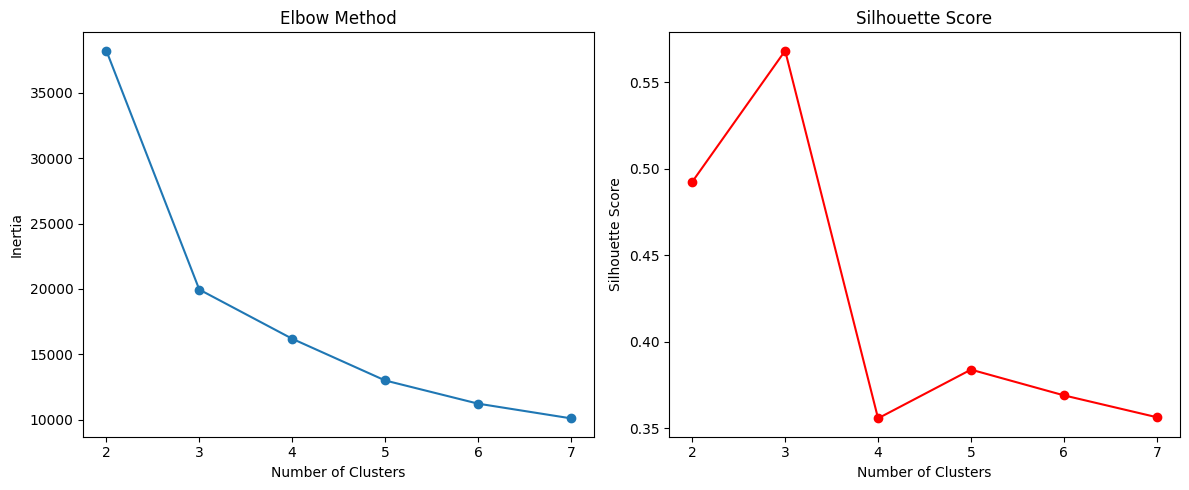

In [ ]:
# Kmeans clustering for Usage dataset
# Finding the optimal number of clusters

# Remove 'customer_id' column
Usage = Usage.drop('customer_id', axis=1)

# Identify categorical columns
categorical_cols = Usage.select_dtypes(include=['object']).columns
print(categorical_cols)

# Apply One-Hot Encoding
Usage_encoded = pd.get_dummies(Usage, columns=categorical_cols, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Usage_encoded)

# Find the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 8)  # Start from 3 clusters to max 7 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

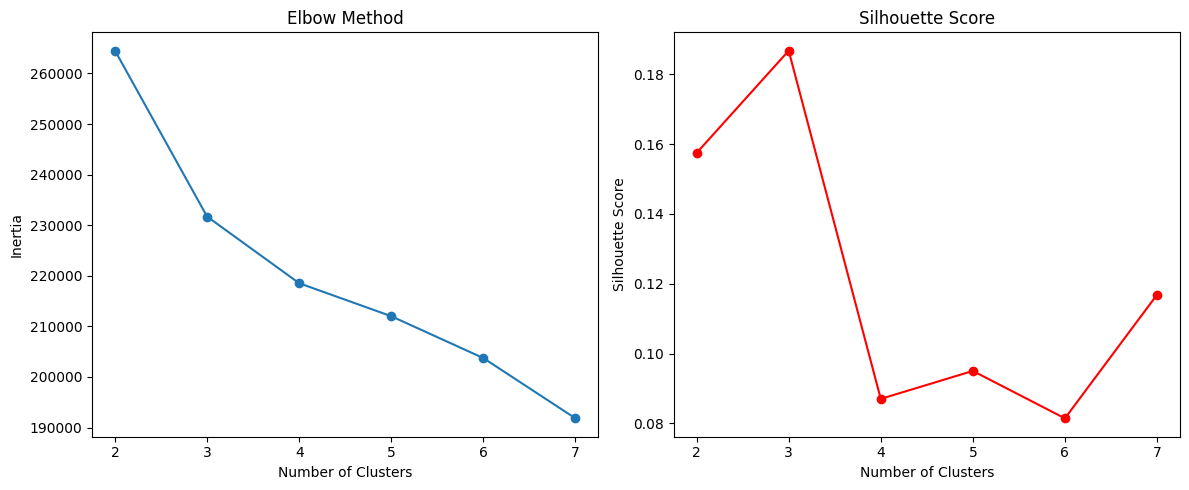

In [ ]:
# Kmeans clustering for Transaction dataset
# Finding the optimal number of clusters

# Remove 'customer_id' column
Transaction = Transaction.drop('customer_id', axis=1)

# Apply One-Hot Encoding to 'peak_month'
Transaction_encoded = pd.get_dummies(Transaction, columns=['peak_month'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Transaction_encoded)

# Find the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 8)  # Start from 3 clusters to max 7 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

From the 3 sets of graphs, we can see that 3 and 5 number of clusters is the most optimal choice for clustering. Hence we will use 3 and 5 clusters for customer segmentations. To keep it simple, we will use the same exact classification used in the original Customers dataset for 5 clusters (unless the clusters strongly suggest otherwise)

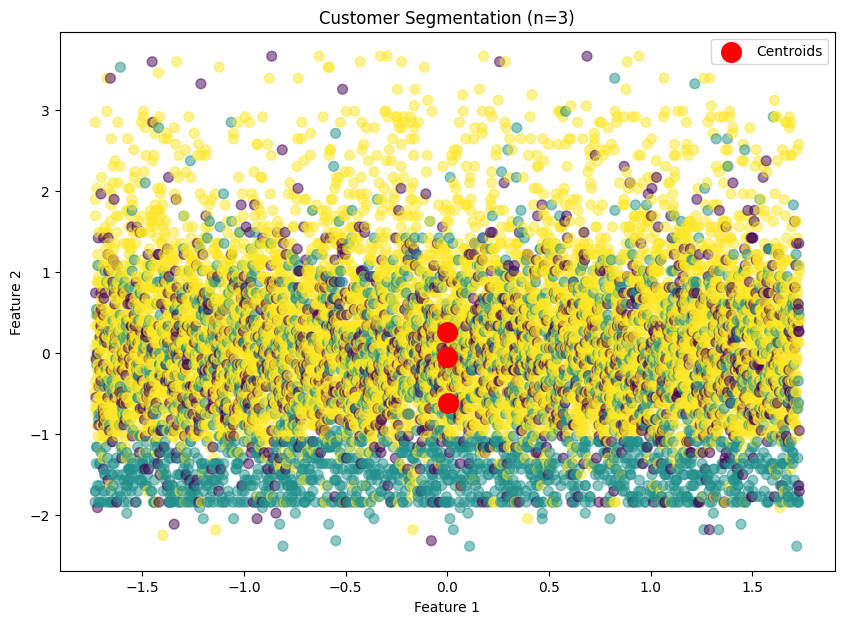


Explained variance by PC1 and PC2 (n=3 clusters): [0.09617884 0.08542713]


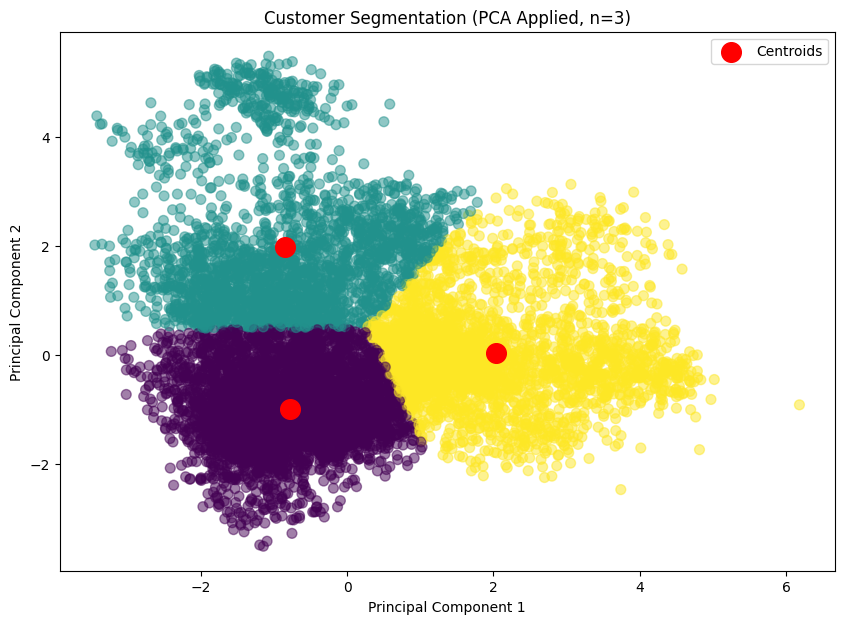


Top 3 features contributing to PC1:
income                0.514465
job_management        0.404707
education_tertiary    0.365333
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
marital_single     0.489344
marital_married    0.436308
job_student        0.395461
Name: PC2, dtype: float64


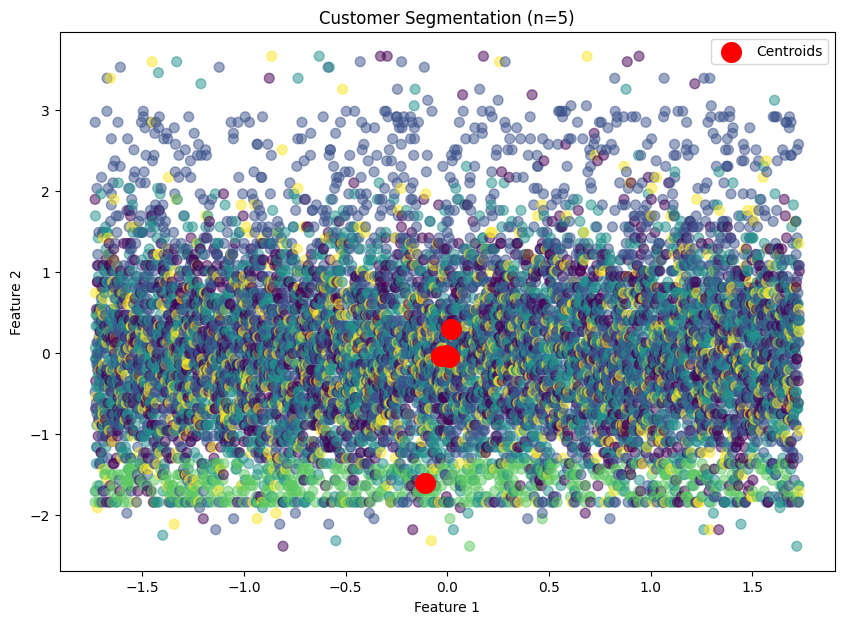


Explained variance by PC1 and PC2 (n=5 clusters): [0.09617949 0.08543196]


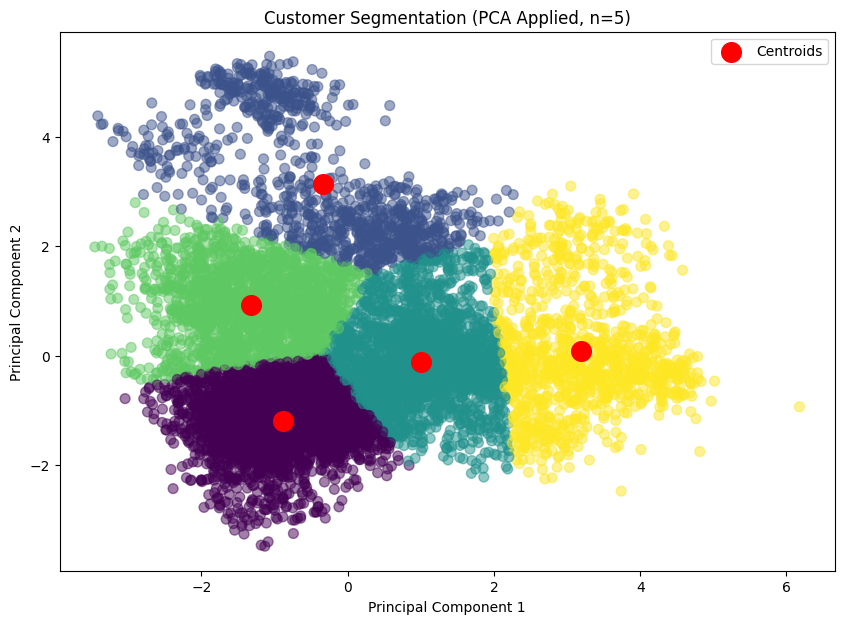


Top 3 features contributing to PC1:
income                0.514185
job_management        0.404061
education_tertiary    0.365610
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
marital_single     0.489871
marital_married    0.436634
job_student        0.396552
Name: PC2, dtype: float64


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def preprocess_data(df):
    """Encodes categorical columns, drops customer_id, and standardizes features."""
    categorical_cols = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    scaler = StandardScaler()
    return scaler.fit_transform(df_encoded), df_encoded.columns

def apply_pca(X_scaled, n_components=2):
    """Applies PCA and returns transformed data along with component loadings."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    return X_pca, pca.components_, explained_variance

def plot_clusters(X, cluster_labels, centroids, title):
    """Plots KMeans clusters."""
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
    plt.xlabel('Principal Component 1' if X.shape[1] == 2 else 'Feature 1')
    plt.ylabel('Principal Component 2' if X.shape[1] == 2 else 'Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

def print_top_features(pca_components, feature_names, n=3):
    """Prints top contributing features for PC1 and PC2."""
    pca_df = pd.DataFrame(pca_components, columns=feature_names, index=['PC1', 'PC2'])
    for pc in ['PC1', 'PC2']:
        print(f"\nTop {n} features contributing to {pc}:")
        print(pca_df.loc[pc].abs().nlargest(n))

# Load and preprocess data
X_scaled, feature_names = preprocess_data(Customers)

# Run clustering and PCA once, then reuse results
for n_clusters in [3, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Plot original feature space clusters
    plot_clusters(X_scaled, cluster_labels, kmeans.cluster_centers_, f'Customer Segmentation (n={n_clusters})')

    # Apply PCA
    X_pca, pca_components, explained_variance = apply_pca(X_scaled)

    print(f"\nExplained variance by PC1 and PC2 (n={n_clusters} clusters): {explained_variance}")

    # KMeans on PCA-transformed data
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

    # Plot PCA-transformed clusters
    plot_clusters(X_pca, cluster_labels_pca, kmeans_pca.cluster_centers_, f'Customer Segmentation (PCA Applied, n={n_clusters})')

    # Print top features for PC1 and PC2
    print_top_features(pca_components, feature_names)


From the above Customers dataset segmentation, The top 4 features are income, job, marital_status and education

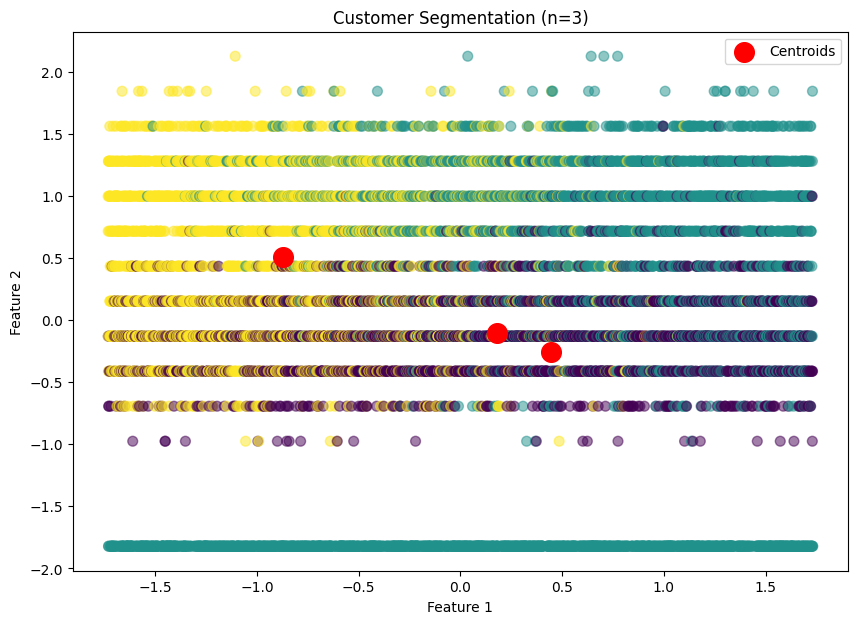


Explained variance by PC1 and PC2 (n=3 clusters): [0.00021476 0.00019416]


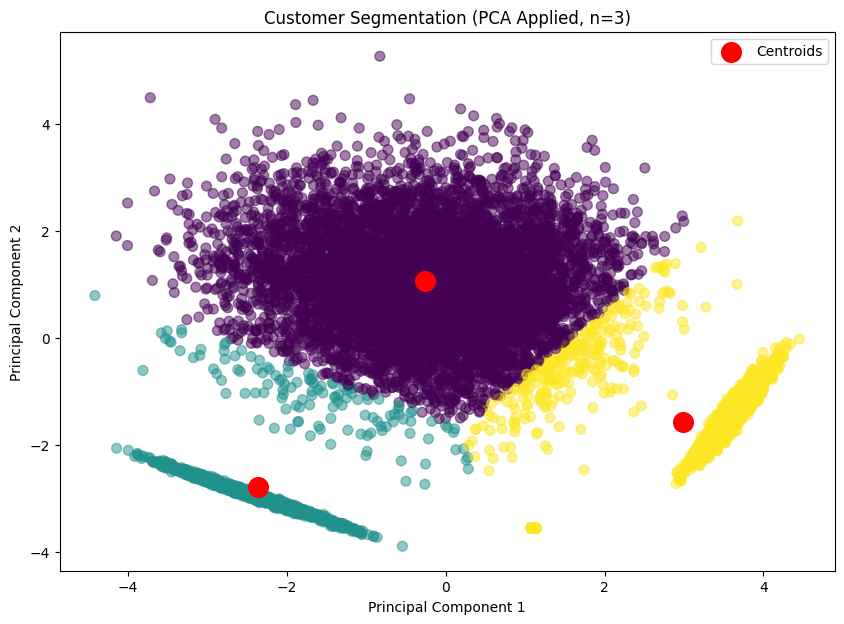


Top 3 features contributing to PC1:
web_logins_per_week         0.421493
avg_web_session_duration    0.394894
has_web_account_Yes         0.367586
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
has_mobile_app_Yes             0.396135
avg_mobile_session_duration    0.381890
mobile_logins_per_week         0.354474
Name: PC2, dtype: float64


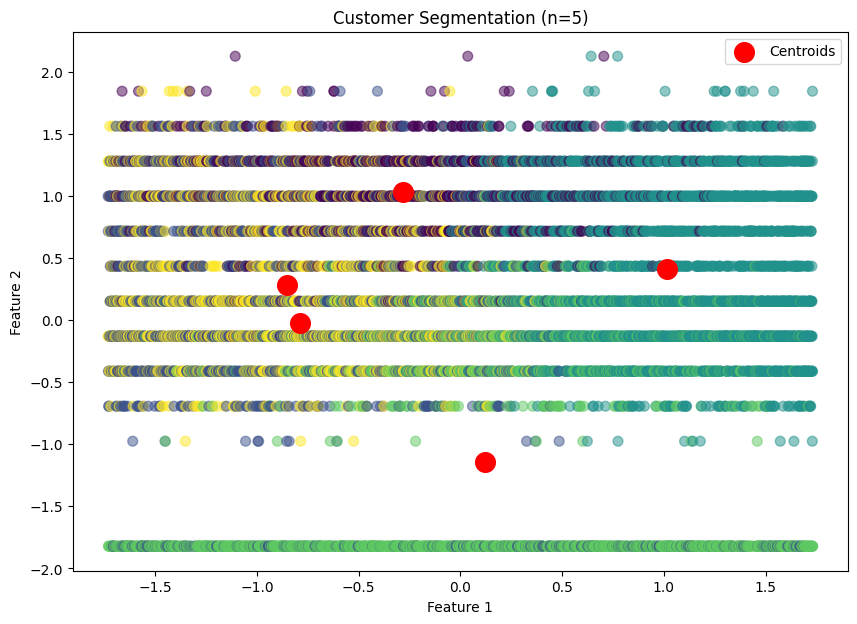


Explained variance by PC1 and PC2 (n=5 clusters): [0.00020976 0.00019325]


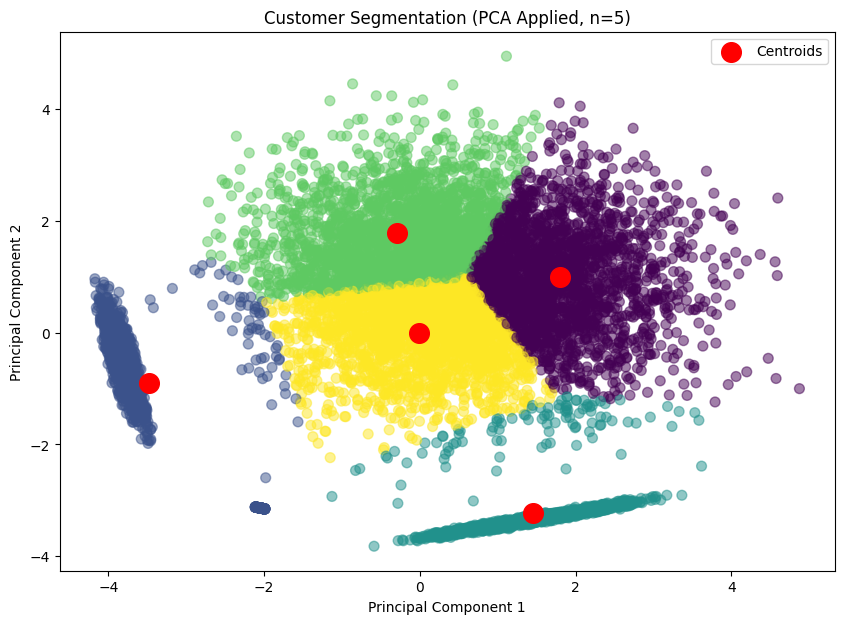


Top 3 features contributing to PC1:
web_logins_per_week         0.444235
avg_web_session_duration    0.434522
has_web_account_Yes         0.409344
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
has_mobile_app_Yes             0.427359
avg_mobile_session_duration    0.424339
mobile_logins_per_week         0.383517
Name: PC2, dtype: float64


In [177]:
# Kmeans clustering for the Usage dataset

# Load and preprocess data
X_scaled, feature_names = preprocess_data(Usage)

# Run clustering and PCA once, then reuse results
for n_clusters in [3, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Plot original feature space clusters
    plot_clusters(X_scaled, cluster_labels, kmeans.cluster_centers_, f'Customer Segmentation (n={n_clusters})')

    # Apply PCA
    X_pca, pca_components, explained_variance = apply_pca(X_scaled)

    print(f"\nExplained variance by PC1 and PC2 (n={n_clusters} clusters): {explained_variance}")

    # KMeans on PCA-transformed data
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

    # Plot PCA-transformed clusters
    plot_clusters(X_pca, cluster_labels_pca, kmeans_pca.cluster_centers_, f'Customer Segmentation (PCA Applied, n={n_clusters})')

    # Print top features for PC1 and PC2
    print_top_features(pca_components, feature_names)

Based on the above Usage segmentation, the top 4 features are avg web session duration, web logins per week, avg mobile session duration, and mobile logins per week. (We ignore the HAS web account/ mobile app as spending time using it implies they have the account)

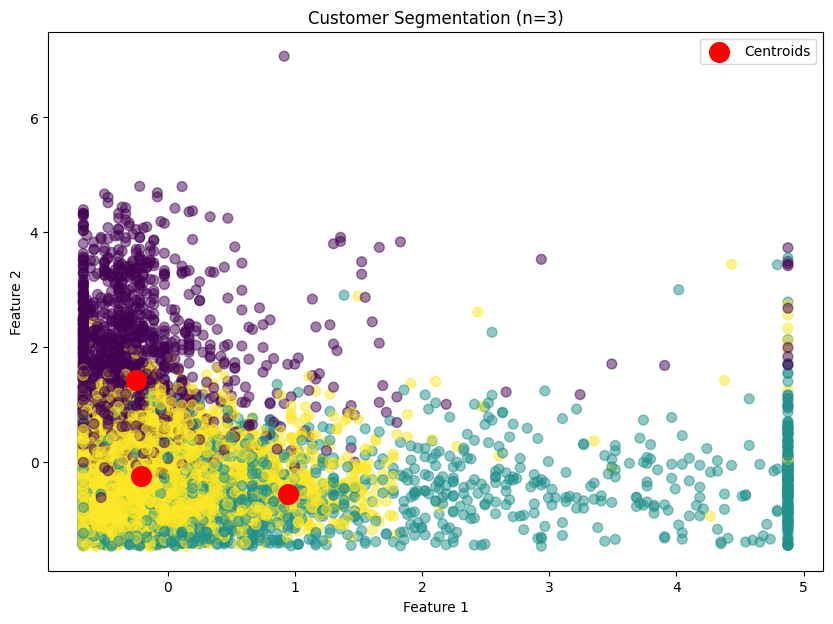


Explained variance by PC1 and PC2 (n=3 clusters): [0.33441749 0.09620456]


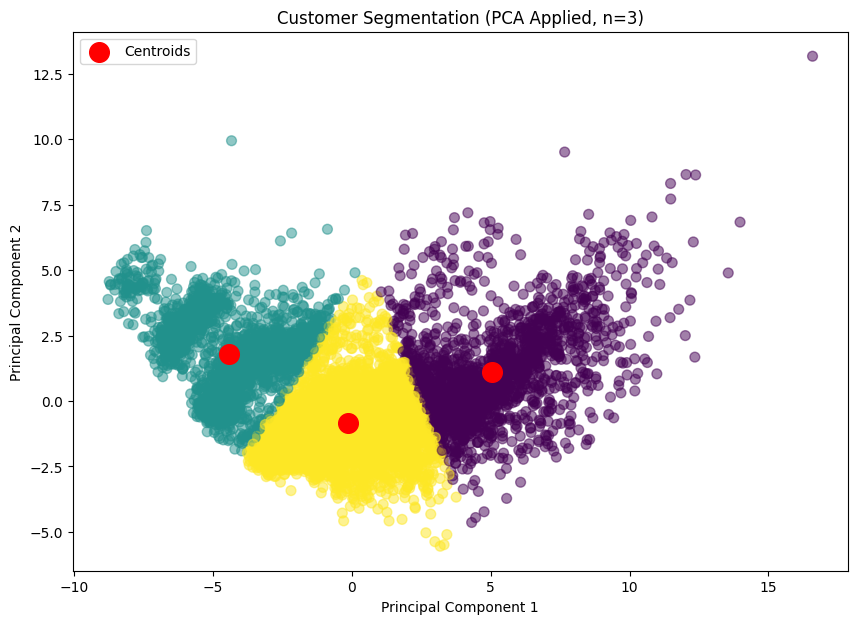


Top 3 features contributing to PC1:
total_transaction_amount_3m    0.265533
total_transactions_12m         0.257998
transaction_frequency_12m      0.257998
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
average_transaction_amount_12m    0.297990
online_transaction_ratio_6m       0.282929
online_transaction_ratio_12m      0.270045
Name: PC2, dtype: float64


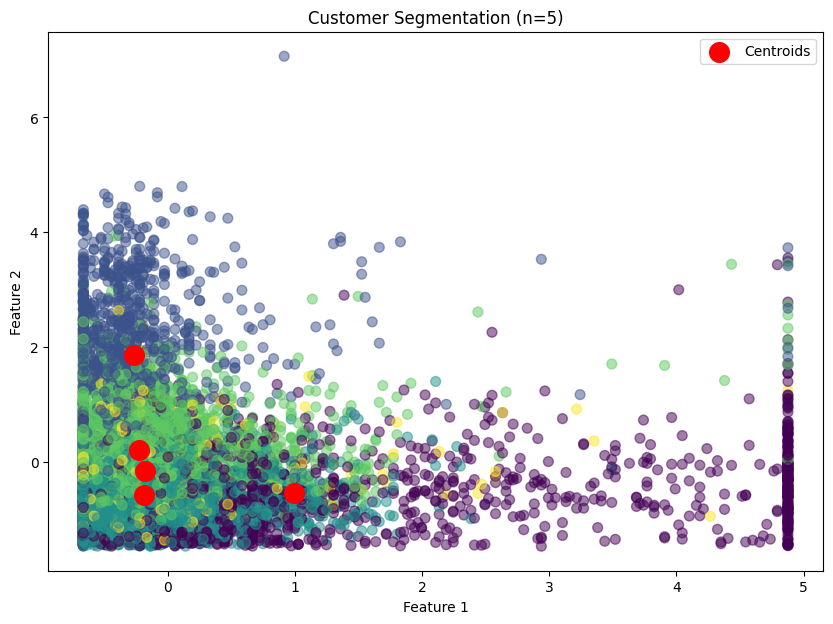


Explained variance by PC1 and PC2 (n=5 clusters): [0.33441749 0.09620455]


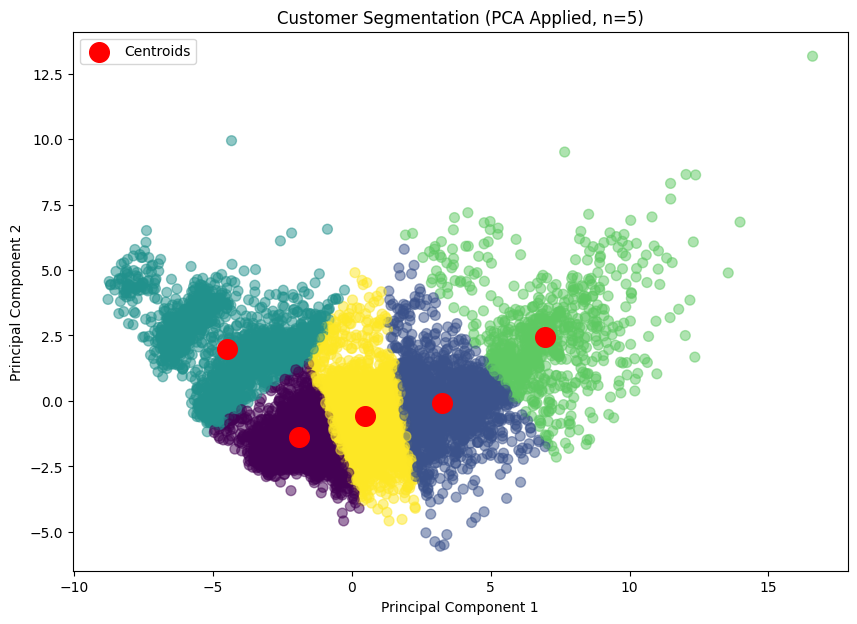


Top 3 features contributing to PC1:
total_transaction_amount_3m    0.265533
total_transactions_12m         0.257998
transaction_frequency_12m      0.257998
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
average_transaction_amount_12m    0.297970
online_transaction_ratio_6m       0.282946
online_transaction_ratio_12m      0.270038
Name: PC2, dtype: float64


In [179]:
# Kmeans clustering for the Transaction dataset

# Apply One-Hot Encoding to 'peak_month'
Transaction_encoded = pd.get_dummies(Transaction, columns=['peak_month'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Transaction_encoded)
feature_names = Transaction_encoded.columns

# Run clustering and PCA once, then reuse results
for n_clusters in [3, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Plot original feature space clusters
    plot_clusters(X_scaled, cluster_labels, kmeans.cluster_centers_, f'Customer Segmentation (n={n_clusters})')

    # Apply PCA
    X_pca, pca_components, explained_variance = apply_pca(X_scaled)

    print(f"\nExplained variance by PC1 and PC2 (n={n_clusters} clusters): {explained_variance}")

    # KMeans on PCA-transformed data
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

    # Plot PCA-transformed clusters
    plot_clusters(X_pca, cluster_labels_pca, kmeans_pca.cluster_centers_, f'Customer Segmentation (PCA Applied, n={n_clusters})')

    # Print top features for PC1 and PC2
    print_top_features(pca_components, feature_names)


From the above Transaction dataset, the top 4 features are total transactions 12m, transaction frequency 12m, avg transaction amount 12m, online transaction ratio 12m. (For simplicity 12m is chosen for easier analysis).

Index(['income', 'job', 'marital', 'education', 'avg_web_session_duration',
       'web_logins_per_week', 'avg_mobile_session_duration',
       'mobile_logins_per_week', 'total_transaction_amount_12m',
       'online_transaction_ratio_12m', 'average_transaction_amount_12m',
       'transaction_frequency_12m'],
      dtype='object')


income          job   marital  education  avg_web_session_duration  \
0       2603  blue-collar   married  secondary                       6.1   
1        793      student  divorced   tertiary                       3.9   
2       3130     services  divorced  secondary                       5.4   
3       2401      retired   married    primary                       6.8   
4       3354   technician    single    primary                       1.6   
...      ...          ...       ...        ...                       ...   
9935    6625   management    single   tertiary                       4.9   
9936    7452   management   married  secondary                       9.5   
9937     689   unemployed   married  secondary                       7.8   
9938    1599  blue-collar   married  secondary                       8.6   
9939    3904   technician   married   tertiary                       5.6   

      web_logins_per_week  avg_mobile_session_duration  \
0                       5                          3.5   
1                       4                          4.5   
2                      10                          2.5   
3                       8                          3.0   
4                       6                          1.3   
...                   ...                          ...   
9935                    5                          2.9   
9936                    4                          5.2   
9937                    9                          4.4   
9938                    8                          0.0   
9939                    9                          0.0   

      mobile_logins_per_week  total_transaction_amount_12m  \
0                         10                  57718.686638   
1                          9                   9043.956358   
2                          6                  28871.833045   
3                          6                  14030.908555   
4                         11                 162747.270829   
...                      ...                           ...   
9935                      11                  88620.357588   
9936                      13                 284544.119616   
9937                       5                   7671.355496   
9938                       0                  18413.776806   
9939                       0                  77564.566579   

      online_transaction_ratio_12m  average_transaction_amount_12m  \
0                         0.680343                      140.434761   
1                         0.665027                       26.678337   
2                         0.594546                      114.570766   
3                         0.495167                       91.705285   
4                         0.732546                      315.401688   
...                            ...                             ...   
9935                      0.652360                      135.920794   
9936                      0.633178                      534.857368   
9937                      0.545804                       29.619133   
9938                      0.514404                       71.371228   
9939                      0.685177                      175.485445   

      transaction_frequency_12m  
0                     34.250000  
1                     28.250000  
2                     21.000000  
3                     12.750000  
4                     43.000000  
...                         ...  
9935                  54.333333  
9936                  44.333333  
9937                  21.583333  
9938                  21.500000  
9939                  36.833333  

[9940 rows x 12 columns]

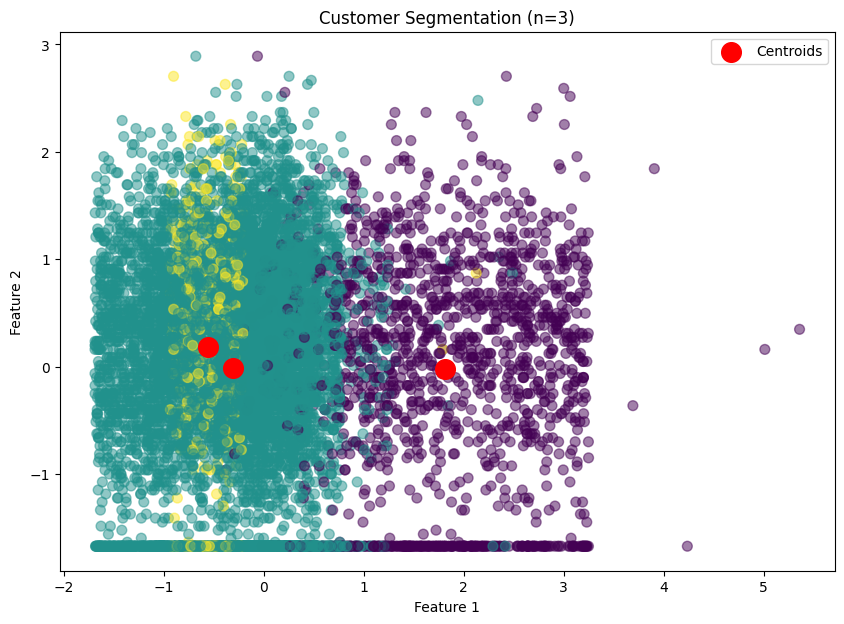


Explained variance by PC1 and PC2 (n=3 clusters): [0.18701145 0.10516987]


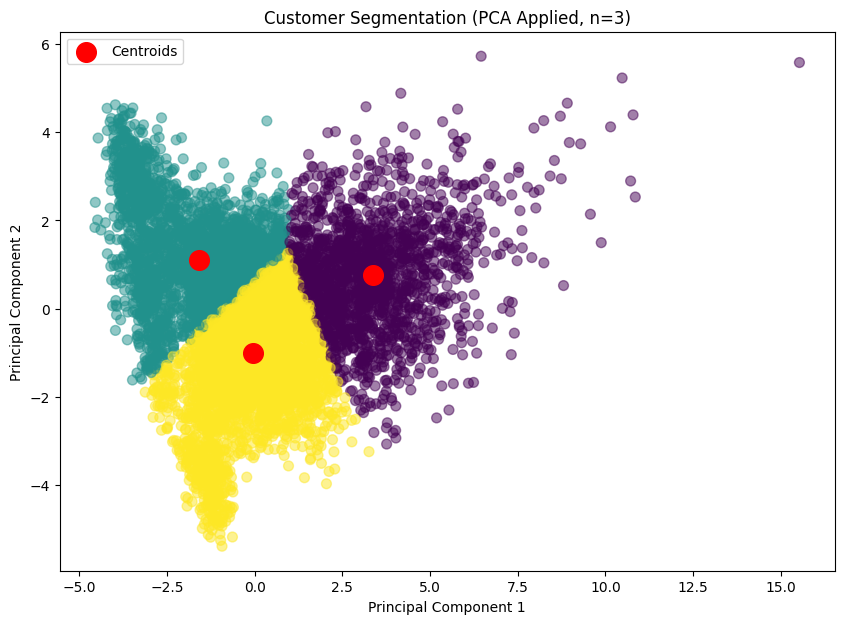


Top 3 features contributing to PC1:
total_transaction_amount_12m    0.423747
income                          0.419116
transaction_frequency_12m       0.402205
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
marital_single                  0.381520
mobile_logins_per_week          0.339996
online_transaction_ratio_12m    0.329804
Name: PC2, dtype: float64


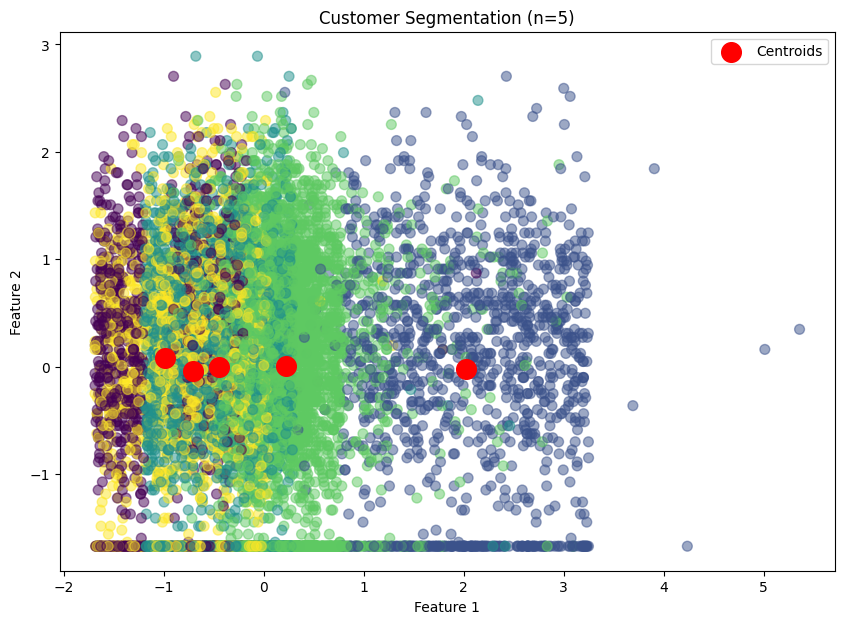


Explained variance by PC1 and PC2 (n=5 clusters): [0.18701145 0.10516987]


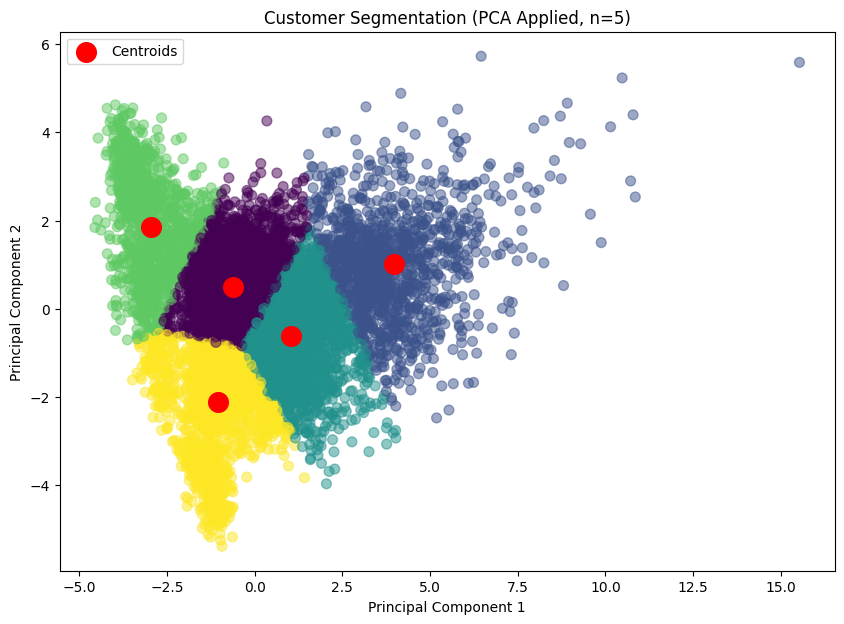


Top 3 features contributing to PC1:
total_transaction_amount_12m    0.423747
income                          0.419116
transaction_frequency_12m       0.402205
Name: PC1, dtype: float64

Top 3 features contributing to PC2:
marital_single                  0.381520
mobile_logins_per_week          0.339968
online_transaction_ratio_12m    0.329804
Name: PC2, dtype: float64


In [184]:
# Keep the relevant features in df merged dataset
print(df.columns)
df = df[['income', 'job', 'marital', 'education','avg_web_session_duration', 'web_logins_per_week', 
         'avg_mobile_session_duration', 'mobile_logins_per_week', 'total_transaction_amount_12m', 'online_transaction_ratio_12m', 'average_transaction_amount_12m', 'transaction_frequency_12m']]
display(df)

# Load and preprocess data
X_scaled, feature_names = preprocess_data(df)

# Run clustering and PCA once, then reuse results
for n_clusters in [3, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Plot original feature space clusters
    plot_clusters(X_scaled, cluster_labels, kmeans.cluster_centers_, f'Customer Segmentation (n={n_clusters})')

    # Apply PCA
    X_pca, pca_components, explained_variance = apply_pca(X_scaled)

    print(f"\nExplained variance by PC1 and PC2 (n={n_clusters} clusters): {explained_variance}")

    # KMeans on PCA-transformed data
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

    # Plot PCA-transformed clusters
    plot_clusters(X_pca, cluster_labels_pca, kmeans_pca.cluster_centers_, f'Customer Segmentation (PCA Applied, n={n_clusters})')

    # Print top features for PC1 and PC2
    print_top_features(pca_components, feature_names)


